In [1]:
import pandas as pd 


In [13]:
data=pd.read_csv('GlobalLandTemperaturesByCity.csv')
data


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [8]:
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [9]:
import matplotlib.pyplot as plt

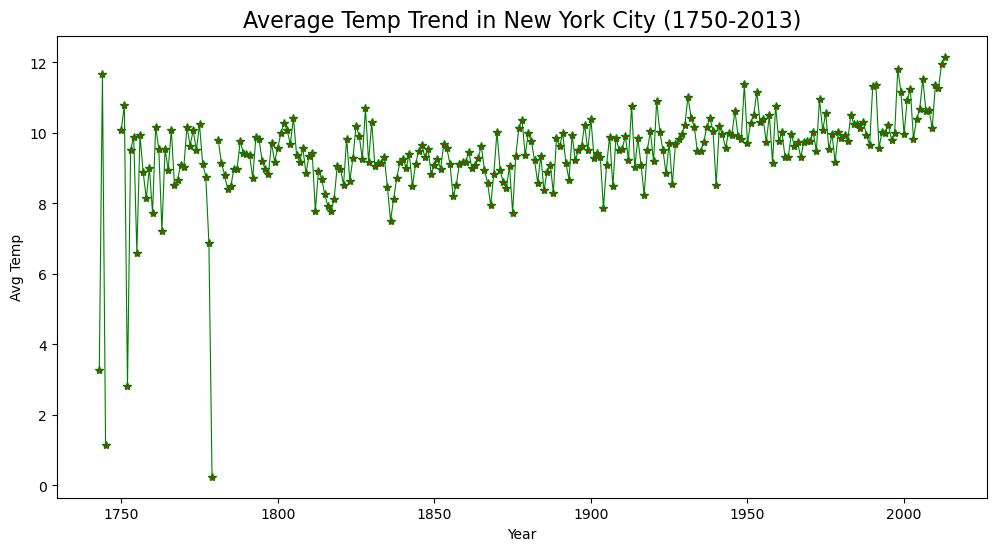

In [27]:
#How has the 
#filter for a city
city_data=data[data['City'] == 'New York'].copy() 

#convert  'dt' column to datetime formate 

city_data['dt'] =pd.to_datetime(city_data['dt'],errors='coerce') 

#Extract year  and cal mean temp for each year 

city_data['year']=city_data['dt'].dt.year 
annual_avg_temp =city_data.groupby('year')['AverageTemperature'].mean().reset_index()

#line plot 

plt.figure(figsize=(12,6))  # Use figsize for proper scaling

plt.plot(annual_avg_temp['year'], annual_avg_temp['AverageTemperature'], linestyle='-',linewidth=0.8 ,color='green' ,marker="*" ,markerfacecolor="red")

plt.title("Average Temp Trend in New York City (1750-2013)", fontsize=16)

# Adding labels

plt.xlabel('Year')
plt.ylabel('Avg Temp')


plt.show()


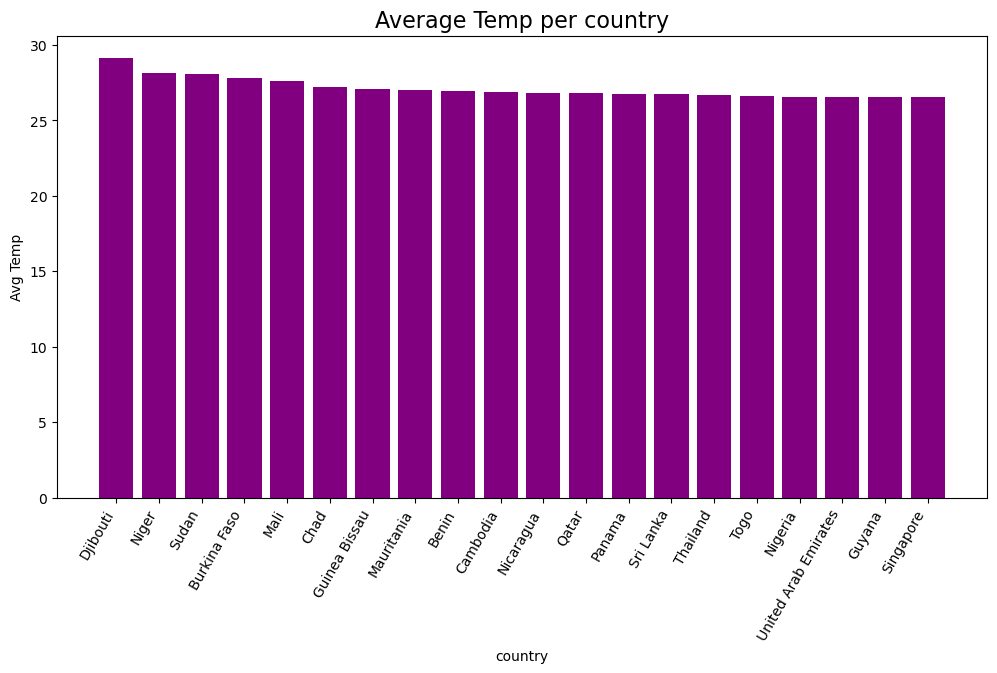

In [50]:
#which countries had the highest average temperature in the dataset? 
#useCase : Comapare categories or groups 
# X-axis : Countries , y-axis : Average Temperature


               
country_avg_temp =data.groupby('Country')['AverageTemperature'].mean().reset_index()

# remove rows with missing temp values 

country_avg_temp =country_avg_temp.dropna()  

#sort countries by avg temp in desc order 

top_countries = country_avg_temp.sort_values(by='AverageTemperature', ascending=False).head(20)

plt.figure(figsize=(12,6))  # Use figsize for proper scaling

plt.bar(top_countries['Country'], top_countries['AverageTemperature'] ,color='purple')

plt.title("Average Temp per country", fontsize=16)

# Adding labels

plt.xlabel('country')
plt.ylabel('Avg Temp')

plt.xticks(rotation=60 ,ha='right')


plt.show()

               


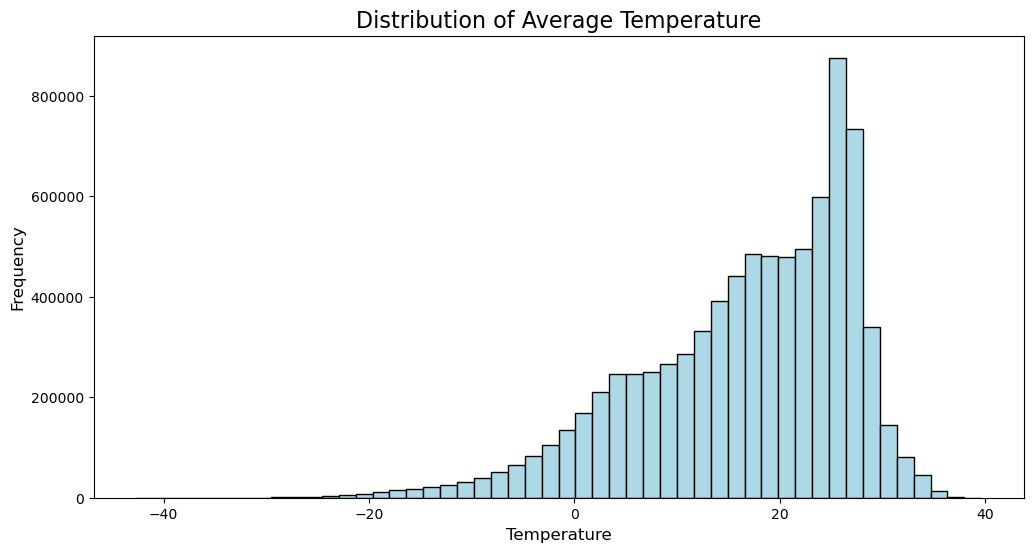

In [69]:
#Histogram 
# what is the distribution of average temp across all data 
#Use case : Understand the frequency of values in a datasets

# remove rows with missing temp values 
temp_data=data['AverageTemperature'].dropna()

#Use figsize for proper scaling
plt.figure(figsize=(12,6))

plt.hist(temp_data , bins=50,color='lightblue' ,edgecolor='black') 

plt.title("Distribution of Average Temperature", fontsize=16)

# Adding labels

plt.xlabel('Temperature',fontsize=12)
plt.ylabel('Frequency',fontsize=12)

plt.show()

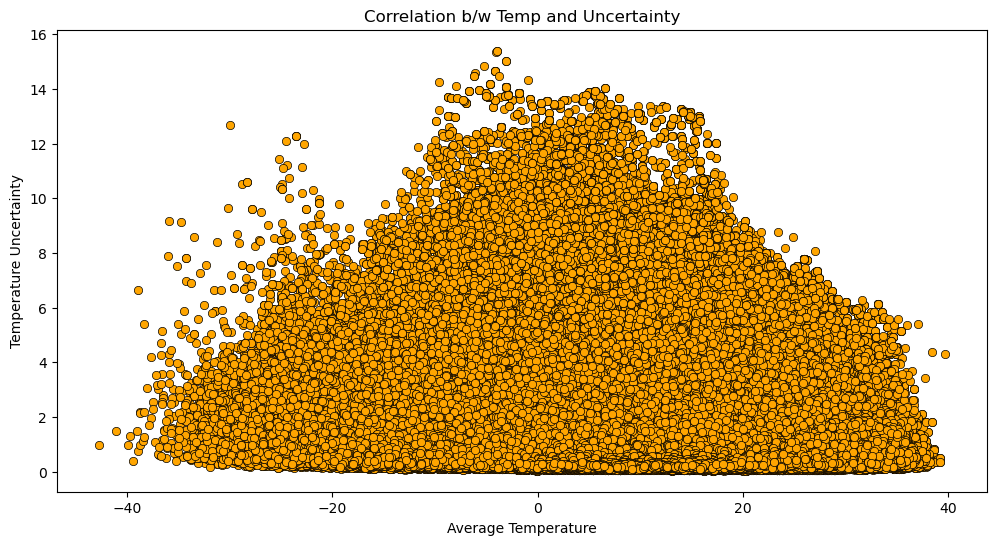

In [71]:
#Scatter plot 
#Is there a correlation b/w temp and uncertainty in the dataset ? 
# Use case : Explore relationships b/w two continuous variables 

# remove rows with missing temp and uncertainty values 
temp_data = data['AverageTemperature'].dropna()
temp_data_uncertainty =data['AverageTemperatureUncertainty'].dropna() 

#Use figsize for proper scaling
plt.figure(figsize=(12,6))

plt.scatter(temp_data , temp_data_uncertainty, color='orange', linewidth=0.5,edgecolor='black') 

plt.title('Correlation b/w Temp and Uncertainty')
plt.xlabel('Average Temperature')
plt.ylabel('Temperature Uncertainty') 
plt.show()

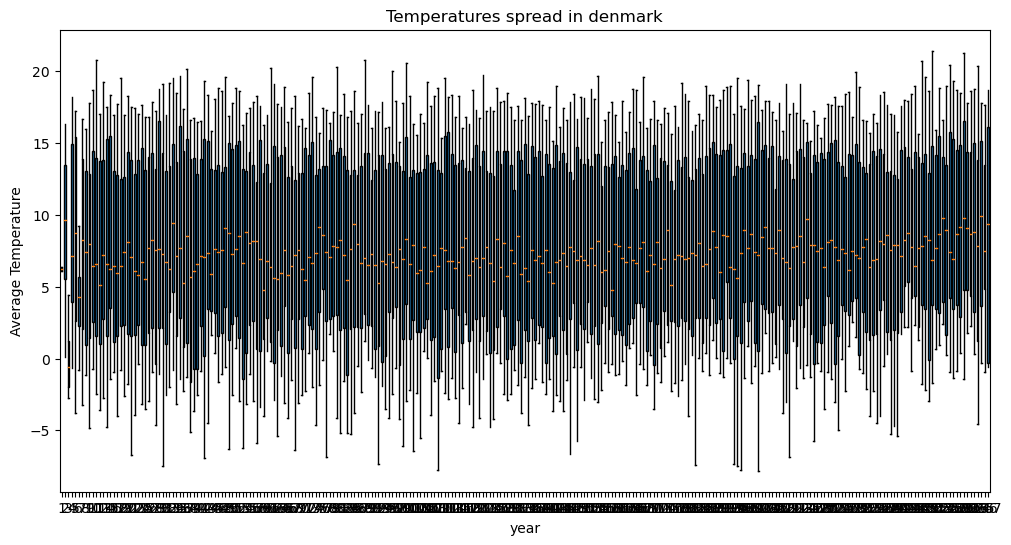

In [82]:
#Box Plot 
#what is the spread of the temps for a specific country over a given period? 
#useCase: Summarize data usingn quartiles, median , and outliers .
 # X-axis : years or country 
 # Y-axis : Average Temp 

country_data=data[data['Country'] == 'Denmark'].copy() 

#converting the dt from object to datetime 
country_data['dt'] =pd.to_datetime(country_data['dt'],errors='coerce') 

#drop rows with ionvalid datetime values

country_data=country_data.dropna(subset=['dt']) 

#Extract year  and cal mean temp for each year 
country_data['year']=country_data['dt'].dt.year 

#remove rows with the missing temp values

country_data=country_data[['year','AverageTemperature']].dropna()

#group data by year 


grouped_data = [group['AverageTemperature'].values for _, group in country_data.groupby('year')]


plt.figure(figsize=(12,6))  # Use figsize for proper scaling

plt.boxplot(grouped_data,showfliers=True , patch_artist=True) 

plt.title('Temperatures spread in denmark')
plt.ylabel('Average Temperature')
plt.xlabel('year') 
plt.show()
 



In [86]:
#Seaborn 
# it is used to visualize multipule plots  at a time 

In [85]:
#To install seaborn we use the below command
!pip install seaborn

In [87]:
# It is used to import the seaborn
import seaborn as sns


In [88]:
# to load the dataset we use this command [in seaborn we have iris,tips,penguvins datasets]
tips = sns.load_dataset('tips')

In [89]:
#to show first five rows
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


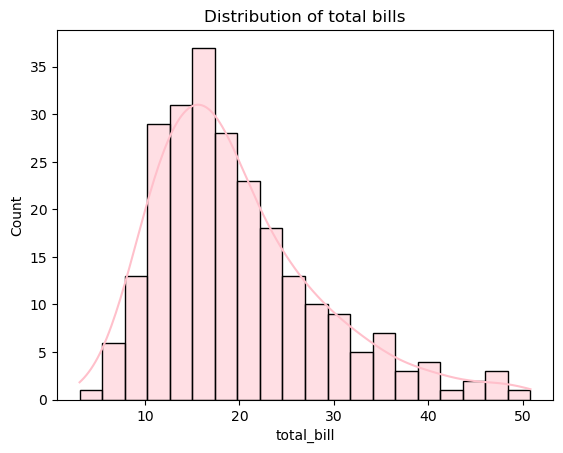

In [92]:
#in seaborn we use "hisplot" to show the histogram  where as in matplotlib we use hist.
sns.histplot(data=tips ,x="total_bill" , kde =True,bins=20,color='pink')
plt.title("Distribution of total bills")
plt.show()

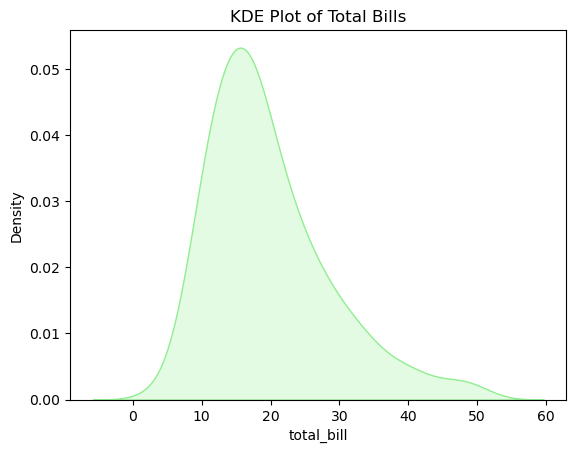

In [102]:
#KDE PLOT (Kernel density estimation)  it uses to visualizes the probaility density of a variable 

sns.kdeplot(data=tips, x="total_bill" ,color='lightgreen',fill=True) 
plt.title("KDE Plot of Total Bills")
plt.show()

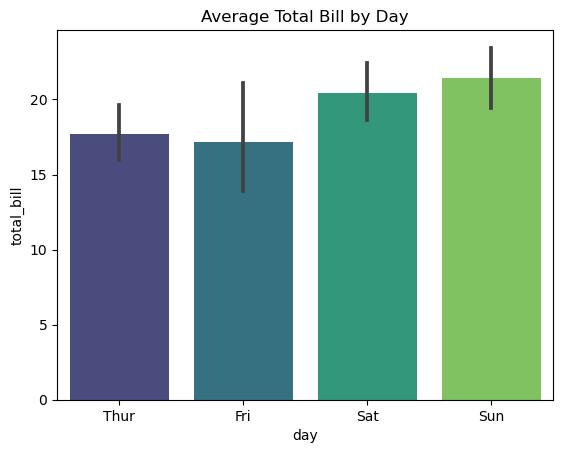

In [103]:
#BAR PLOT using sns
sns.barplot(data=tips, x="day", y="total_bill" ,palette="viridis")
plt.title("Average Total Bill by Day")
plt.show()

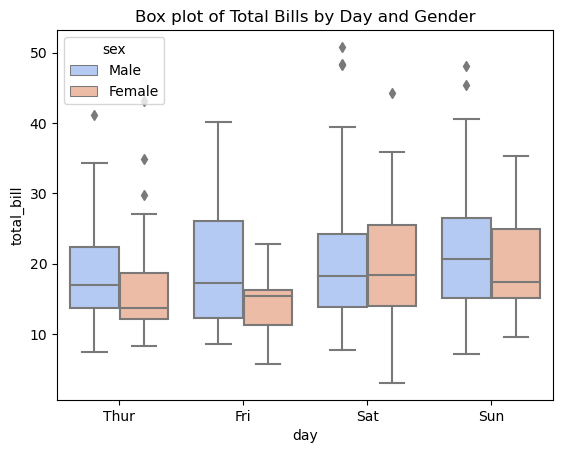

In [104]:
#BOXPLOT using sns
sns.boxplot(data=tips, x="day", y="total_bill" , hue ="sex" , palette="coolwarm")
plt.title("Box plot of Total Bills by Day and Gender")
plt.show()

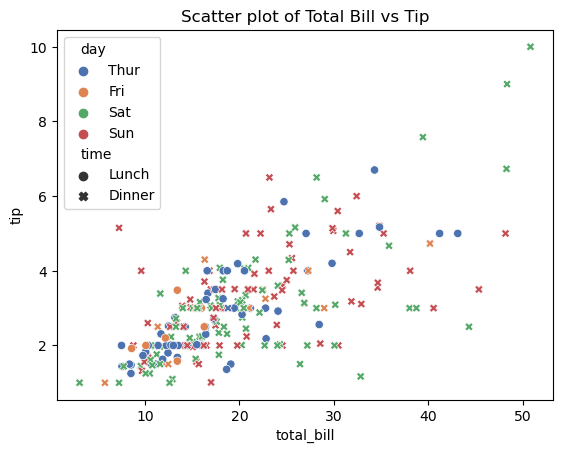

In [106]:
#SCATTERPLOT using sns
sns.scatterplot(data=tips,  x="total_bill",y="tip", hue= "day" , style= "time" ,palette="deep")
plt.title("Scatter plot of Total Bill vs Tip")
plt.show()

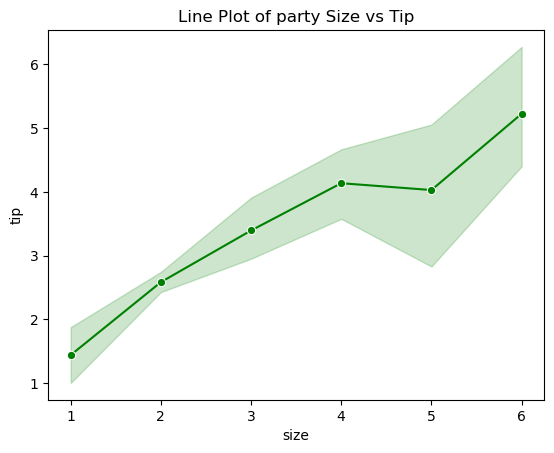

In [107]:
sns.lineplot(data=tips,  x="size",y="tip", marker="o" ,color="green")
plt.title("Line Plot of party Size vs Tip")
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


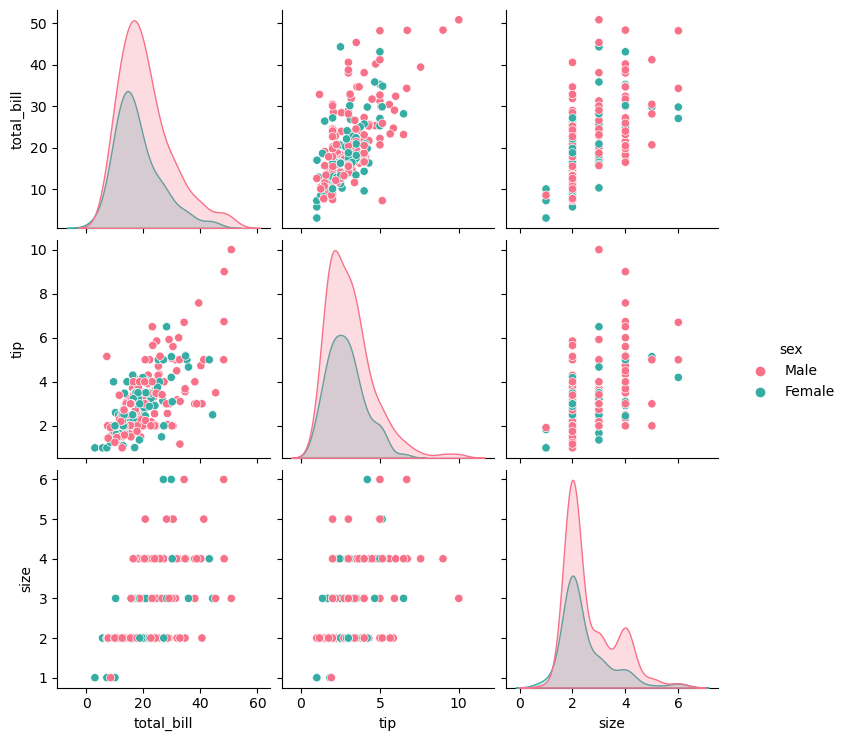

In [109]:
sns.pairplot(data=tips, hue= "sex" ,palette="husl")

plt.show()

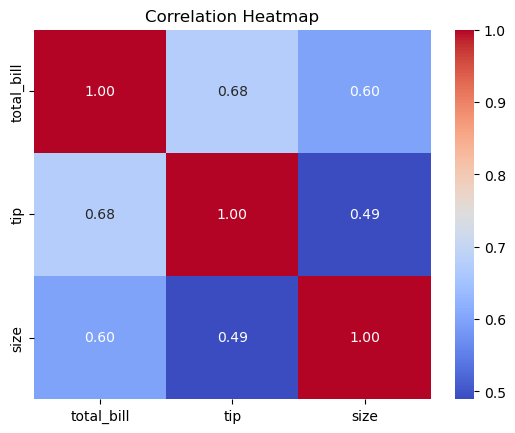

In [113]:


numeric_data = tips.select_dtypes(include=['number', 'float', 'int'])

correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")

plt.show()